In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Part A: Speech Recognition Basic Model

In [4]:
file_path='/kaggle/input/common-voice/cv-valid-train.csv'
df_train=pd.read_csv(file_path)


In [5]:
df_train

,filename,text,up_votes,down_votes,age,gender,accent,duration
0,cv-valid-train/sample-000000.mp3,learn to recognize omens and follow them the o...,1,0,NaN,NaN,NaN,NaN
1,cv-valid-train/sample-000001.mp3,everything in the universe evolved he said,1,0,NaN,NaN,NaN,NaN
2,cv-valid-train/sample-000002.mp3,you came so that you could learn about your dr...,1,0,NaN,NaN,NaN,NaN
3,cv-valid-train/sample-000003.mp3,so now i fear nothing because it was those ome...,1,0,NaN,NaN,NaN,NaN
4,cv-valid-train/sample-000004.mp3,if you start your emails with greetings let me...,3,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
195771,cv-valid-train/sample-195771.mp3,the englishman said nothing,1,0,thirties,male,england,NaN
195772,cv-valid-train/sample-195772.mp3,the irish man sipped his tea,1,0,NaN,NaN,NaN,NaN
195773,cv-valid-train/sample-195773.mp3,what do you know about that,1,0,NaN,NaN,NaN,NaN
195774,cv-valid-train/sample-195774.mp3,the phone rang while she was awake,2,0,twenties,male,us,NaN


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195776 entries, 0 to 195775
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   filename    195776 non-null  object 
 1   text        195776 non-null  object 
 2   up_votes    195776 non-null  int64  
 3   down_votes  195776 non-null  int64  
 4   age         73768 non-null   object 
 5   gender      74059 non-null   object 
 6   accent      64711 non-null   object 
 7   duration    0 non-null       float64
dtypes: float64(1), int64(2), object(5)
memory usage: 11.9+ MB


In [7]:
from IPython.display import display,Audio


In [8]:
def play_audio(audio_path):
    display(Audio(filename=audio_path))

In [9]:
folder_path='/kaggle/input/common-voice/cv-valid-train/cv-valid-train'
files=sorted([f for f in os.listdir(folder_path) if f.endswith('.mp3')])

In [10]:
files[0]

'sample-000000.mp3'

In [11]:
for i in range(10):
    individual_file_path=os.path.join(folder_path,files[i])
    play_audio(individual_file_path)


In [12]:
from transformers import pipeline


In [13]:
pipe=pipeline("automatic-speech-recognition",model="openai/whisper-base")

config.json:   0%|          | 0.00/1.98k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/290M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.81k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

In [14]:
import warnings

In [15]:
warnings.simplefilter(action='ignore',category=FutureWarning)

In [58]:
for i in range(10):
    individual_file_path=os.path.join(folder_path,files[i])
    predicted_text=pipe(inputs=individual_file_path)
    actual_text=df_train["text"][i]
    predicted_text=str(predicted_text)[11:]
    predicted_text=predicted_text[:-2]
    
    play_audio(individual_file_path)
    print(f'Actual Text:"{actual_text}"')
    print(f'Predicted Text: "{predicted_text}"')
    

Actual Text:"learn to recognize omens and follow them the old king had said"
Predicted Text: "Learn to recognize omens and follow them, the old king had said."


Actual Text:"everything in the universe evolved he said"
Predicted Text: "Everything in the universe evolved. He said."


Actual Text:"you came so that you could learn about your dreams said the old woman"
Predicted Text: "You came so that you could learn about your dreams at the old woman."


Actual Text:"so now i fear nothing because it was those omens that brought you to me"
Predicted Text: "So now I fear nothing because it was those humans that brought you to me."


Actual Text:"if you start your emails with greetings let me be the first to welcome you to earth"
Predicted Text: "If you start your emails with greetings, let me be the first to welcome you to earth."


Actual Text:"a shepherd may like to travel but he should never forget about his sheep"
Predicted Text: "A shepherd may like to travel, but he should never forget about his sheep."


Actual Text:"night fell and an assortment of fighting men and merchants entered and exited the tent"
Predicted Text: "Night fell, and then a sortment of fighting men and merchants entered and exited the tent."


Actual Text:"i heard a faint movement under my feet"
Predicted Text: "I heard a faint movement under my feet."


Actual Text:"put jackie right on the staff"
Predicted Text: "Put Jackie right on the staff."


Actual Text:"when he speaks in our language i can interpret what he has said"
Predicted Text: "Quando ele se pique em sua language, ele pode interpretar o risco de ele que ele sabe."


In [17]:
import tensorflow as tf

In [18]:
def Audio_to_text(audio_file_path):
    predicted_text = pipe(inputs=audio_file_path)
    predicted_text=str(predicted_text)[11:]
    predicted_text=predicted_text[:-2]
    return predicted_text
    

## Part B:Clipping Audio

In [19]:
import os
from pydub import AudioSegment
import random
import librosa
import numpy as np
import soundfile as sf
from pydub import AudioSegment
import random

In [20]:
def trim_audio(audio, max_trim=27000, min_trim=20000):
    audio_length = len(audio)  
    
    trim_duration = random.randint(min_trim, max_trim)
    start_trim = random.randint(int(audio_length*0.1), int(audio_length*0.9) - trim_duration)
    end_trim = start_trim + trim_duration
    noise = np.random.randn(len(audio[start_trim:end_trim]))  
    trimmed_audio = np.concatenate((audio[:start_trim], noise*random.random()*0.09, audio[end_trim:]))
    return trimmed_audio

# Directory paths
input_path = os.path.join(folder_path,files[2])
output_directory = "/kaggle/working/clip_audio"
os.makedirs(output_directory, exist_ok=True)

if input_path.endswith(".mp3"):
    output_path = os.path.join(output_directory, files[2])
    audio, sr = librosa.load(input_path, sr=None)
    print(len(audio)/sr)
    clip_audio = trim_audio(audio)
    sf.write(output_path, clip_audio, sr)
    print(f"Trimmed audio saved: {output_path}")

print(f"Files[0]: {files[2]}")
play_audio('/kaggle/working/clip_audio/sample-000002.mp3')

5.064
Trimmed audio saved: /kaggle/working/clip_audio/sample-000002.mp3
Files[0]: sample-000002.mp3


In [21]:
text=Audio_to_text('/kaggle/working/clip_audio/sample-000002.mp3')

Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.43.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


## Part C: Adding Noise in Audio 

In [22]:
import librosa
import numpy as np
import soundfile as sf
from pydub import AudioSegment
import random

In [23]:
def add_noise(audio, noise_factor=random.random()*0.02):
    noise = np.random.randn(len(audio))  
    augmented_audio = audio + noise_factor * noise
    return augmented_audio

In [24]:
input_audio_path = os.path.join(folder_path,files[2])
output_directory = "/kaggle/working/noise_audio"
os.makedirs(output_directory, exist_ok=True)

if input_audio_path.endswith(".mp3"):
    output_path = os.path.join(output_directory, files[2])
    audio, sr = librosa.load(input_audio_path, sr=None)
    noisy_audio = add_noise(audio)
    sf.write(output_path, noisy_audio, sr)
    print(f"Noisy audio saved: {output_path}")

Noisy audio saved: /kaggle/working/noise_audio/sample-000002.mp3


In [25]:
text=Audio_to_text('/kaggle/input/common-voice/cv-valid-train/cv-valid-train/sample-000002.mp3')

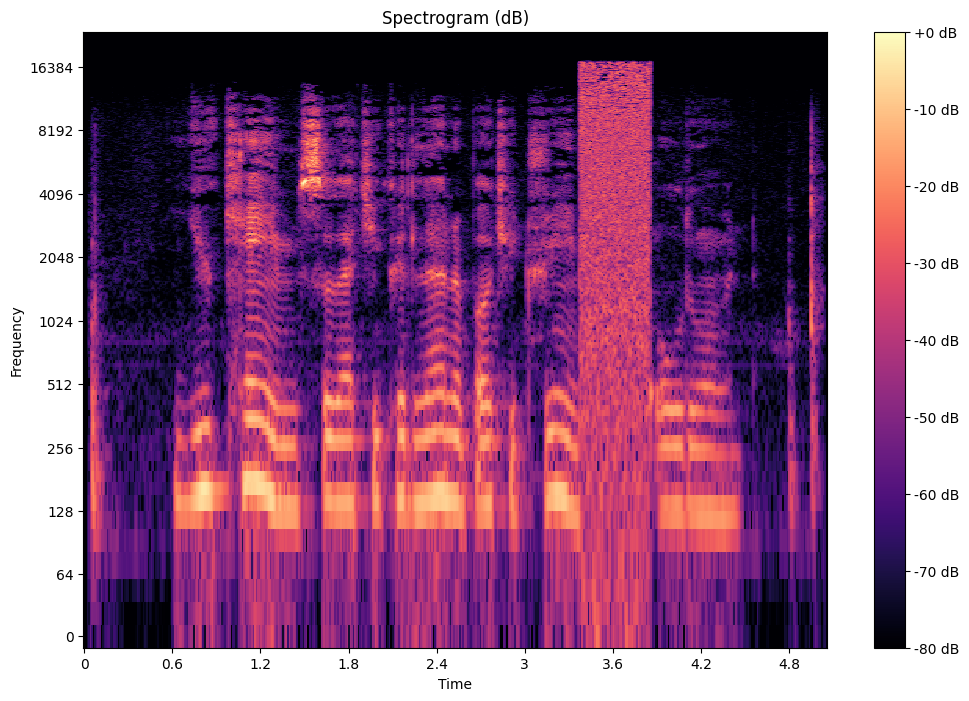

In [26]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

def plot_spectrogram(audio_path):
    y, sr = librosa.load(audio_path, sr=None)
    
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    plt.figure(figsize=(12, 8))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', cmap='magma')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram (dB)')
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.show()

audio_path = '/kaggle/working/clip_audio/sample-000002.mp3'  
plot_spectrogram(audio_path)
play_audio(audio_path)

In [27]:
import librosa

def store_amplitude(audio_path, frame_duration=0.05):
    y, sr = librosa.load(audio_path, sr=None)
    frame_length = int(sr * frame_duration)  
    hop_length = frame_length 
    rms_values = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length)
    amplitude_list = rms_values[0].tolist() 
    return amplitude_list


audio_path = '/kaggle/working/clip_audio/sample-000002.mp3' 
amplitude_values = store_amplitude(audio_path)


## Noise Added and Clipped Together

In [28]:
input_audio_path = os.path.join(folder_path,files[2])
output_directory = "/kaggle/working/noise_and_clipped_audio"
os.makedirs(output_directory, exist_ok=True)

if input_audio_path.endswith(".mp3"):
    output_path = os.path.join(output_directory, files[2])
    audio, sr = librosa.load(input_audio_path, sr=None)
    noisy_audio = add_noise(audio)
    clip_audio = trim_audio(noisy_audio)
    sf.write(output_path, clip_audio, sr)
    print(f"Noisy and clipped audio saved: {output_path}")


/
print(f"Files[0]: {files[2]}")
play_audio('/kaggle/working/noise_and_clipped_audio/sample-000002.mp3')

Noisy and clipped audio saved: /kaggle/working/noise_and_clipped_audio/sample-000002.mp3
Files[0]: sample-000002.mp3


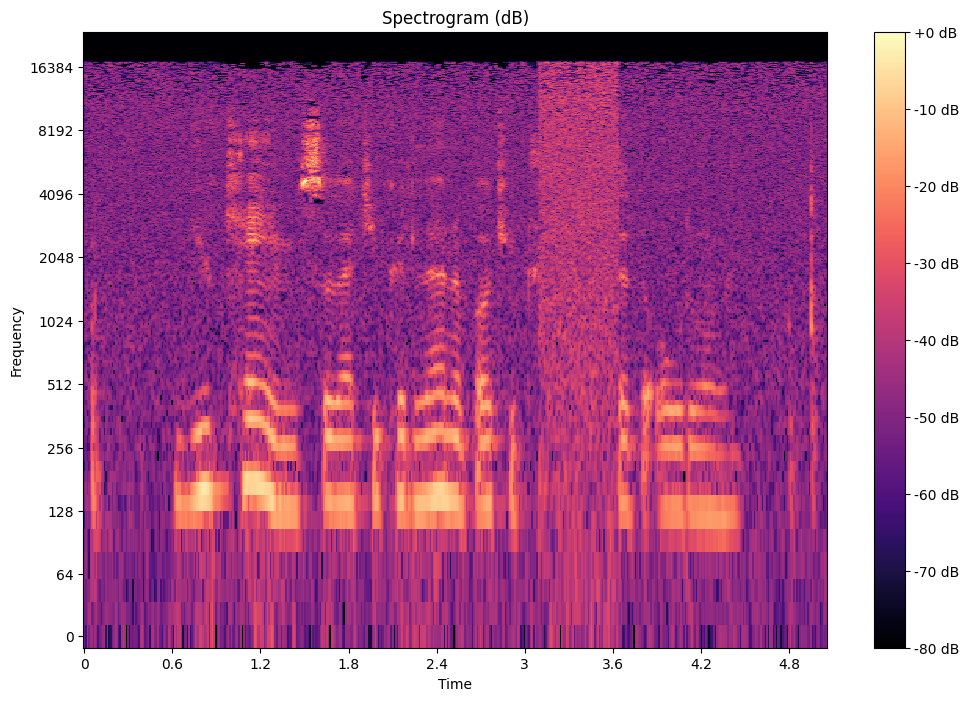

In [29]:
plot_spectrogram('/kaggle/working/noise_and_clipped_audio/sample-000002.mp3')
amplitudes=list(store_amplitude('/kaggle/working/noise_and_clipped_audio/sample-000002.mp3'))

## Part D: Audio Breaking and Joining

In [59]:
def differentiator(amplitudes):
    count=0
    break_list=[]
    for i in range(len(amplitudes)):
        if(i>=10 and abs(amplitudes[i]-amplitudes[i-1])<0.005):
            count+=1
            if(count>=5):
               break_list.append(i*0.05)
               count=-1
        else:
            count=0
    return break_list

differentiator(amplitudes)

[3.4000000000000004, 4.7]

In [31]:
audio,sr=librosa.load('/kaggle/working/noise_and_clipped_audio/sample-000002.mp3',sr=None)
audio1=audio[:int(1.5*sr)]
audio2=audio[int(1.5*sr):]
Audio(audio1,rate=sr)
# Audio(audio2,rate=sr)

In [32]:
input_audio_path = '/kaggle/working/noise_and_clipped_audio/sample-000002.mp3'
output_directory = "/kaggle/working/broken"
os.makedirs(output_directory, exist_ok=True)

if input_audio_path.endswith(".mp3"):
    output_path1 = os.path.join(output_directory, 'sample-000002.mp3')
    audio, sr = librosa.load(input_audio_path, sr=None)
    clip_audio1=audio[:int(sr*differentiator(store_amplitude(input_audio_path))[0])]
    sf.write(output_path1, clip_audio1, sr)
    print(f"Noisy and clipped audio saved: {output_path1}")



print(f"Files[0]: {files[2]}")
play_audio('/kaggle/working/broken/sample-000002.mp3')

Noisy and clipped audio saved: /kaggle/working/broken/sample-000002.mp3
Files[0]: sample-000002.mp3


In [33]:
def break_audio(audio_file_path,amplitudes):
    output_directory = "/kaggle/working/broken"
    os.makedirs(output_directory, exist_ok=True)
    if input_audio_path.endswith(".mp3"):
        output_path1 = os.path.join(output_directory,audio_file_path.split('/')[-1] )
        audio, sr = librosa.load(audio_file_path, sr=None)
        clip_audio1=audio[:int(sr*amplitude[1])]
        sf.write(output_path1, clip_audio1, sr)
        
    

In [34]:
import re
def combinator(broken_path1,old_path):
    text1=Audio_to_text(broken_path1)
    cleaned_text1 = re.sub(r'[^A-Za-z0-9\s]', '', text1)
    text1=cleaned_text1
    all_text=Audio_to_text(old_path)
    cleaned_text2 = re.sub(r'[^A-Za-z0-9\s]', '', all_text)
    text1=cleaned_text2
    words_from_text1=text1.split()
    text2=""
    for i in range(len(text_all.split())):
        if(i>len(words_from_text1 or words_from_text1[i]!=text_all.split()[i])):
            text2+=" "
            text2+=text_all.split()[i]
    masked2=text1+" <mask>"+text2.lower()
    
    mask1=text2.lower().split()[0]
    
    
    words1=text2.lower().split()
    rest1=' '.join(words1[1:])
    masked1=text1+" <mask> "+rest1
    return masked2,masked1

In [35]:
text2=Audio_to_text('/kaggle/working/broken/sample-000002.mp3')
import re
cleaned_text2 = re.sub(r'[^A-Za-z0-9\s]', '', text2)
text2=cleaned_text2

In [36]:
text1=Audio_to_text('/kaggle/working/broken/sample-000002.mp3')

cleaned_text1 = re.sub(r'[^A-Za-z0-9\s]', '', text1)
text1=cleaned_text1

In [37]:
text_all=Audio_to_text('/kaggle/working/noise_and_clipped_audio/sample-000002.mp3')

In [38]:
words_from_text1=text1.split()
text3=""
for i in range(len(text_all.split())):
    if(i>len(words_from_text1 or words_from_text1[i]!=text_all.split()[i])):
        text3+=" "
        text3+=text_all.split()[i]
        
        

In [39]:
text2=text3

In [40]:
text_all

'You came so that you could learn about your set the old one.'

In [41]:
masked2=text1+" <mask>"+text2.lower()

In [42]:

if len(text2.lower().split())>0:
    mask1=text2.lower().split()[0]
else:
    mask1=""

words1=text2.lower().split()
rest1=' '.join(words1[1:])
masked1=text1+" <mask> "+rest1

In [43]:
masked1

'You came so that you could learn about you <mask> old one.'

In [44]:
masked2

'You came so that you could learn about you <mask> the old one.'

## Part E: Ready For Prediction

In [45]:
from transformers import pipeline
prediction_function = pipeline(task="fill-mask", model="roberta-base")

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [46]:
def predictor_masked_sentences(masked1,masked2):
    result = prediction_function(masked1)
    print(f"Masked: {masked1}")
    check=False
    for i in range(5):
        if(result[i]['token_str']==mask1):
            print(result[i]['sequence'])
            check=True
    if(check==False):
        print(prediction_function(masked2)[0]['sequence'])

In [47]:
result = prediction_function(masked1)
print(f"Masked: {masked1}")
check=False
for i in range(5):
    if(result[i]['token_str']==mask1):
        print(result[i]['sequence'])
        check=True
if(check==False):
    print(prediction_function(masked2)[0]['sequence'])

Masked: You came so that you could learn about you <mask> old one.
You came so that you could learn about you, the old one.


## Part F: Integrating All

In [48]:
# Speech 
def Audio_to_text(audio_file_path):
    predicted_text = pipe(inputs=audio_file_path)
    predicted_text=str(predicted_text)[11:]
    predicted_text=predicted_text[:-2]
    play_audio(audio_file_path)
    return predicted_text
    
def play_audio(audio_path):
    display(Audio(filename=audio_path))

# Part B
def trim_audio(audio, max_trim=27000, min_trim=25000):
    audio_length = len(audio)  
    
    trim_duration = random.randint(min_trim, max_trim)
    start_trim = random.randint(int(audio_length*0.1), int(audio_length*0.9) - trim_duration)
    end_trim = start_trim + trim_duration
    noise = np.random.randn(len(audio[start_trim:end_trim]))  
    trimmed_audio = np.concatenate((audio[:start_trim], noise*random.random()*0.09, audio[end_trim:]))
    return trimmed_audio

def add_noise(audio, noise_factor=random.random()*0.02):
    noise = np.random.randn(len(audio))  
    augmented_audio = audio + noise_factor * noise
    return augmented_audio

# Part C
def plot_spectrogram(audio_path):

    y, sr = librosa.load(audio_path, sr=None)
    

    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    

    plt.figure(figsize=(12, 8))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', cmap='magma')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram (dB)')
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.show()

def store_amplitude(audio_path, frame_duration=0.05):
    y, sr = librosa.load(audio_path, sr=None)
    frame_length = int(sr * frame_duration)  
    hop_length = frame_length 
    rms_values = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length)
    amplitude_list = rms_values[0].tolist()  
    return amplitude_list
# Part D
def differentiator(amplitudes):
    count=0
    break_list=[]
    for i in range(len(amplitudes)):
        if(i!=0 and abs(amplitudes[i]-amplitudes[i-1])<0.005):
            count+=1
            if(count>=5):
               break_list.append(i*0.05)
               count=-1
        else:
            count=0
    return break_list
def break_audio(audio_file_path,amplitudes):
    output_directory = "/kaggle/working/broken"
    os.makedirs(output_directory, exist_ok=True)
    if input_audio_path.endswith(".mp3"):
        output_path1 = os.path.join(output_directory,audio_file_path.split('/')[-1] )
        audio, sr = librosa.load(audio_file_path, sr=None)
        clip_audio1=audio[:int(sr*amplitude[1])]
        sf.write(output_path1, clip_audio1, sr)
    
def combinator(broken_path1,old_path):
    text1=Audio_to_text(broken_path1)
    cleaned_text1 = re.sub(r'[^A-Za-z0-9\s]', '', text1)
    text1=cleaned_text1
    all_text=Audio_to_text(old_path)
    cleaned_text2 = re.sub(r'[^A-Za-z0-9\s]', '', all_text)
    text1=cleaned_text2
    words_from_text1=text1.split()
    text2=""
    for i in range(len(text_all.split())):
        if(i>len(words_from_text1 or words_from_text1[i]!=text_all.split()[i])):
            text2+=" "
            text2+=text_all.split()[i]
    masked2=text1+" <mask>"+text2.lower()
    
    mask1=text2.lower().split()[0]
    
    
    words1=text2.lower().split()
    rest1=' '.join(words1[1:])
    masked1=text1+" <mask> "+rest1
    return masked2,masked1

prediction_function = pipeline(task="fill-mask", model="roberta-base")

def predictor_of_masked_sentences(masked1,masked2):
    result = prediction_function(masked1)
    print(f"Masked: {masked1}")
    check=False
    for i in range(5):
        if(result[i]['token_str']==mask1):
            print(result[i]['sequence'])
            check=True
    if(check==False):
        print(prediction_function(masked2)[0]['sequence'])

In [49]:
def Base_Distortion_Creator(audio_file_path):
    print(f"The Original Audio")
    
    def Audio_to_text(audio_file_path):
        predicted_text = pipe(inputs=audio_file_path)
        predicted_text=str(predicted_text)[11:]
        predicted_text=predicted_text[:-2]
        play_audio(audio_file_path)
        return predicted_text
    print(Audio_to_text(audio_file_path))  
    def trim_audio(audio, max_trim=30000, min_trim=20000):
        audio_length = len(audio)  
        trim_duration = random.randint(min_trim, max_trim)
        start_trim = random.randint(int(audio_length*0.1), int(audio_length*0.9) - trim_duration)
        end_trim = start_trim + trim_duration
        noise = np.random.randn(len(audio[start_trim:end_trim]))  
        trimmed_audio = np.concatenate((audio[:start_trim], noise*random.random()*0.09, audio[end_trim:]))
        return trimmed_audio

    def add_noise(audio, noise_factor=random.random()*0.02):
        noise = np.random.randn(len(audio))  
        augmented_audio = audio + noise_factor * noise
        return augmented_audio
        
    def loading_audio(audio_file_path):
        audio,sr=librosa.load(audio_file_path,sr=None)
        return audio,sr

    audio,sr=loading_audio(audio_file_path)
    noisy_audio=add_noise(audio)
    clipped_audio=trim_audio(noisy_audio)
    file=audio_file_path.split('/')[-1]
    output_inventory='/kaggle/working/noise_and_clipped_audio'
    os.makedirs(output_inventory,exist_ok=True)
    output_path=os.path.join(output_inventory,file)
    sf.write(output_path,clipped_audio,sr)
    print(f"The Distorted File is saved in {output_path}")
    print(f"The Distorted Audio:")
    play_audio(output_path)
    return output_path
    




def Base_Differentiator_Model(audio_file_path):
    def store_amplitude(audio_path, frame_duration=0.05):
        y, sr = librosa.load(audio_path, sr=None)
        frame_length = int(sr * frame_duration)  
        hop_length = frame_length 
        rms_values = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length)
        amplitude_list = rms_values[0].tolist()  # Convert to list
        return amplitude_list
    print(Audio_to_text(audio_file_path))
    
    def differentiator(amplitudes):
        # print(amplitudes)
        count=0
        break_list=[]
        for i in range(len(amplitudes)):
            if(i>=10 and abs(amplitudes[i]-amplitudes[i-1])<0.005):
                count+=1
                if(count>=4):
                   break_list.append(i*0.05)
                   count=-1
            else:
                count=0
        return break_list

           
    def break_audio(audio_file_path,break_list):
        output_directory = "/kaggle/working/broken"
        os.makedirs(output_directory, exist_ok=True)
        if input_audio_path.endswith(".mp3"):
            output_path1 = os.path.join(output_directory,audio_file_path.split('/')[-1] )
            audio, sr = librosa.load(audio_file_path, sr=None)
            clip_audio1=audio[:int(sr*break_list[0])]
            sf.write(output_path1, clip_audio1, sr)
            # print(f"break_list{break_list}")
            return output_path1
    
    
    def combinator(broken_path1,old_path):
        text1=Audio_to_text(broken_path1)
        cleaned_text1 = re.sub(r'[^A-Za-z0-9\s]', '', text1)
        text1=cleaned_text1
        all_text=Audio_to_text(old_path)
        cleaned_text2 = re.sub(r'[^A-Za-z0-9\s]', '', all_text)
        text_all=cleaned_text2
        words_from_text1=text1.split()
        text2=""
        for i in range(len(text_all.split())):
            if(i>=len(words_from_text1) or words_from_text1[i]!=text_all.split()[i]):
                text2+=" "
                text2+=text_all.split()[i]
        print(f"text1: {text1}")
        print(f"text2: {text2}")
        masked2=text1+" <mask>"+text2.lower()
        if(len(text2.lower().split())>0):
            mask1=text2.lower().split()[0]
        else:
            mask1=""
        words1=text2.lower().split()
        rest1=' '.join(words1[1:])
        masked1=text1+" <mask> "+rest1
        return masked2,masked1
 
        
    amplitudes=store_amplitude(audio_file_path)
    break_list=differentiator(amplitudes)
    broken_path=break_audio(audio_file_path,break_list)
    masked1,masked2=combinator(broken_path,audio_file_path)
    return masked1,masked2




def predictor_of_masked_sentences(masked1,masked2):
    result = prediction_function(masked1)
    print(f"Masked: {masked1}")
    check=False
    for i in range(5):
        if(result[i]['token_str']==mask1):
            print(result[i]['sequence'])
            check=True
    # if(check==False):
    #     print(f"Alternate Masked: {masked2}")
    #     print(prediction_function(masked2)[0]['sequence'])
    print(result[0]['sequence'])

def Final_Predictor(audio_file_path):
    noise_output_path=Base_Distortion_Creator(audio_file_path)
    masked1,masked2=Base_Differentiator_Model(noise_output_path)
    predictor_of_masked_sentences(masked1,masked2)
    

In [61]:
def Test_Predictor(audio_file_path):
    masked1,masked2=Base_Differentiator_Model(audio_file_path)
    predictor_of_masked_sentences(masked1,masked2)

In [71]:
Test_Predictor('/kaggle/input/real-time4/Record (online-voice-recorder.com) (3).mp3')

I am running to office.


text1: I am running
text2:  to office
Masked: I am running <mask> to office
I am running back to office


In [68]:
Final_Predictor('/kaggle/input/common-voice/cv-valid-train/cv-valid-train/sample-000019.mp3')

The Original Audio


Then I got a hold of some dough and went goofy.
The Distorted File is saved in /kaggle/working/noise_and_clipped_audio/sample-000019.mp3
The Distorted Audio:


Then I got some joe when went goofy.


text1: Then I go
text2:  got some joe when went goofy
Masked: Then I go <mask> got some joe when went goofy
Then I go and got some joe when went goofy


# Rough Section

In [53]:
tokens=text.split()
missing_word=[]
generated_data=[]
for i in tokens:
    missing_word.append(i)
for i in range(2*len(tokens)):
    masked_text=""
    for j in range(len(tokens)):
        if(i%2!=0):
            if(int(i/2)==j):
                masked_text+="<mask>"
            else:
                masked_text+=tokens[j]
            
        elif(i%2==0):
            if(i/2==j):
                masked_text+="<mask> "
                masked_text+=tokens[j]  
            else:
                masked_text+=tokens[j]
        
        
        if(j!=len(tokens)-1):
            masked_text+=" "
    generated_data.append(masked_text)
            
            
            

In [54]:
Distorted=generated_data[1::2]
Filler=generated_data[0::2]

In [60]:
Filler


['<mask> You came so that you could learn about your dreams at the old woman.',
 'You <mask> came so that you could learn about your dreams at the old woman.',
 'You came <mask> so that you could learn about your dreams at the old woman.',
 'You came so <mask> that you could learn about your dreams at the old woman.',
 'You came so that <mask> you could learn about your dreams at the old woman.',
 'You came so that you <mask> could learn about your dreams at the old woman.',
 'You came so that you could <mask> learn about your dreams at the old woman.',
 'You came so that you could learn <mask> about your dreams at the old woman.',
 'You came so that you could learn about <mask> your dreams at the old woman.',
 'You came so that you could learn about your <mask> dreams at the old woman.',
 'You came so that you could learn about your dreams <mask> at the old woman.',
 'You came so that you could learn about your dreams at <mask> the old woman.',
 'You came so that you could learn about

In [56]:
from transformers import pipeline
prediction_function=pipeline(task="fill-mask",model="roberta-base")

In [57]:
generated_filler=prediction_function(i for i in generated_data[1::2])